<a href="https://colab.research.google.com/github/sharanya39/web_scrapping/blob/main/categorize_by_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests pillow deepface bing-image-downloader


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=a1fe36b5a04f18a37d8e7bd0627f312a58ddce78e2e8610cb01286b251011264
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [2]:
!pip install requests pillow deepface bing-image-downloader

import os
import shutil
from deepface import DeepFace
from bing_image_downloader import downloader

# Paths
base_folder = "/content/images"
emotion_folder = "/content/emotion_sorted"

# Ensure folders exist
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Clear and recreate emotion folders
def setup_emotion_folders():
    emotions = ["happy", "angry", "sad", "fear", "surprise", "disgust", "neutral"]
    for emotion in emotions:
        create_dir(os.path.join(emotion_folder, emotion))

# Categories with proper query names
categories = {
    "men": "high quality portrait photo of man face",
    "women": "high quality portrait photo of woman face",
    "kids": "high quality portrait photo of kid face"
}

# Download 20 images for each category into correct folders (remove extra subfolders)
def download_and_move_images():
    for category, query in categories.items():
        temp_download_folder = os.path.join(base_folder, f"temp_{category}")
        downloader.download(query, limit=10, output_dir=base_folder, adult_filter_off=True, force_replace=False, timeout=60)

        # Bing Image Downloader puts images in a subfolder named after the query
        query_folder = os.path.join(base_folder, query)

        # Create correct category folder (men, women, kids)
        final_category_folder = os.path.join(base_folder, category)
        create_dir(final_category_folder)

        # Move images to correct category folder
        if os.path.exists(query_folder):
            for file_name in os.listdir(query_folder):
                src = os.path.join(query_folder, file_name)
                dst = os.path.join(final_category_folder, file_name)
                shutil.move(src, dst)

            # Clean up empty query folder
            shutil.rmtree(query_folder)

# Detect emotion and return the detected emotion
def detect_emotion(image_path):
    try:
        result = DeepFace.analyze(img_path=image_path, actions=['emotion'], enforce_detection=False)
        dominant_emotion = result[0]['dominant_emotion']
        return dominant_emotion
    except Exception as e:
        print(f"Face not detected or error in {image_path}: {e}")
        return None

# Process images and sort into emotion folders
def sort_images_by_emotion():
    emotions = ["happy", "angry", "sad", "fear", "surprise", "disgust", "neutral"]
    setup_emotion_folders()

    for category in categories.keys():
        category_folder = os.path.join(base_folder, category)

        if not os.path.exists(category_folder):
            continue

        for file_name in os.listdir(category_folder):
            image_path = os.path.join(category_folder, file_name)
            emotion = detect_emotion(image_path)

            if emotion and emotion in emotions:
                dest_folder = os.path.join(emotion_folder, emotion)
                shutil.copy(image_path, dest_folder)
                print(f"Copied {file_name} to {emotion} folder.")
            else:
                print(f"No clear emotion detected for {file_name}")

# Main pipeline
def main():
    download_and_move_images()
    sort_images_by_emotion()
    print("✅ Images downloaded, processed, and sorted into emotion folders.")

if __name__ == "__main__":
    main()


25-02-27 19:42:21 - Directory /root/.deepface has been created
25-02-27 19:42:21 - Directory /root/.deepface/weights has been created
[%] Downloading Images to /content/images/high quality portrait photo of man face


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://images.pexels.com/photos/14391915/pexels-photo-14391915.jpeg?auto=compress&amp;cs=tinysrgb&amp;dpr=1&amp;w=500
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.pixabay.com/photo/2017/06/17/10/06/man-2411694_1280.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://images.pexels.com/photos/803866/pexels-photo-803866.jpeg?auto=compress&amp;cs=tinysrgb&amp;w=1260&amp;h=750&amp;dpr=1
[%] File Downloaded !

[%] Downloading Image #4 from https://images.pexels.com/photos/3328064/pexels-photo-3328064.jpeg?cs=srgb&amp;dl=pexels-hudson-marques-3328064.jpg&amp;fm=jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.pexels.com/photos/8347589/pe

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 70.4MB/s]


Copied Image_6.jpeg to neutral folder.
Copied Image_1.jpeg to fear folder.
Copied Image_10.jpeg to sad folder.
Copied Image_8.jpeg to sad folder.
Copied Image_7.jpeg to sad folder.
Copied Image_4.jpeg to neutral folder.
Copied Image_5.jpeg to sad folder.
Copied Image_3.jpeg to fear folder.
Copied Image_2.jpg to angry folder.
Copied Image_9.jpeg to fear folder.
Copied Image_7.jpg to neutral folder.
Copied Image_4.jpg to sad folder.
Copied Image_6.jpg to fear folder.
Copied Image_3.jpg to neutral folder.
Copied Image_1.jpg to neutral folder.
Copied Image_9.jpg to happy folder.
Copied Image_2.jpg to neutral folder.
Copied Image_8.jpg to neutral folder.
Copied Image_10.jpg to neutral folder.
Copied Image_5.jpg to neutral folder.
Copied Image_7.jpg to neutral folder.
Copied Image_6.jpg to happy folder.
Copied Image_2.jpeg to fear folder.
Copied Image_10.jpeg to neutral folder.
Copied Image_3.jpg to sad folder.
Copied Image_1.jpg to neutral folder.
Copied Image_4.jpeg to sad folder.
Copied I

In [3]:
import glob

for emotion in ["happy", "angry", "sad", "fear", "surprise", "disgust", "neutral"]:
    files = glob.glob(f"/content/emotion_sorted/{emotion}/*")
    print(f"📂 {emotion}: {len(files)} images")


📂 happy: 3 images
📂 angry: 1 images
📂 sad: 7 images
📂 fear: 5 images
📂 surprise: 0 images
📂 disgust: 0 images
📂 neutral: 10 images


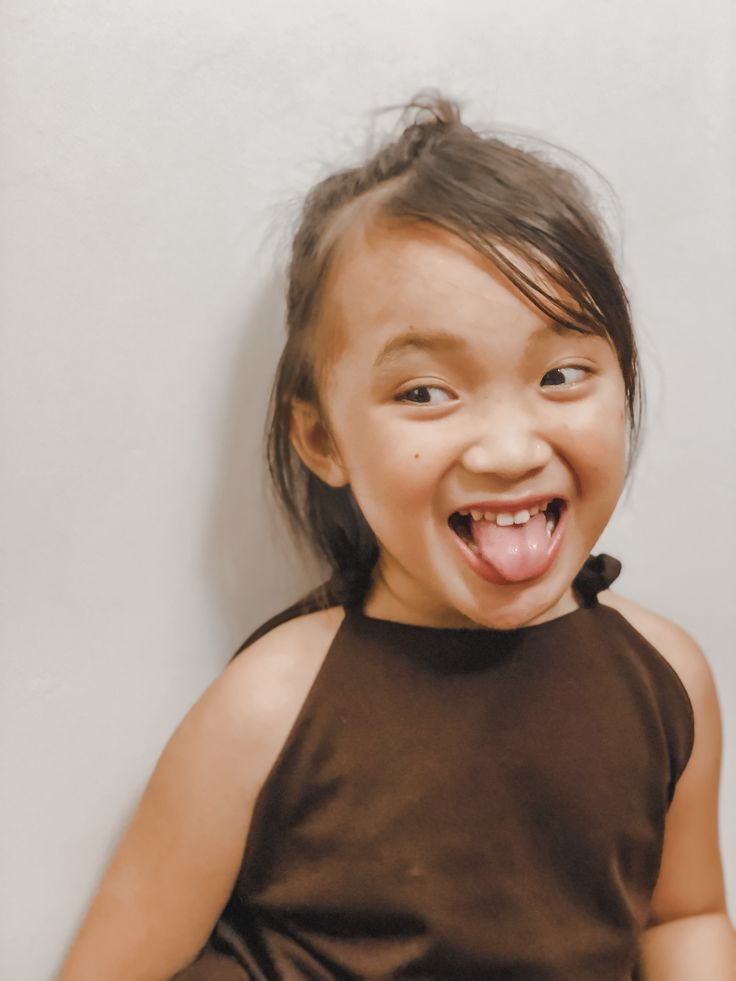

In [5]:
from IPython.display import Image, display
import random

def show_random_images(emotion_folder, emotion):
    folder_path = os.path.join(emotion_folder, emotion)
    if os.path.exists(folder_path):
        images = os.listdir(folder_path)
        if images:
            img_path = os.path.join(folder_path, random.choice(images))
            display(Image(img_path))
        else:
            print(f"No images found for {emotion}.")
    else:
        print(f"Emotion folder {emotion} does not exist.")

# Example
show_random_images(emotion_folder, "happy")


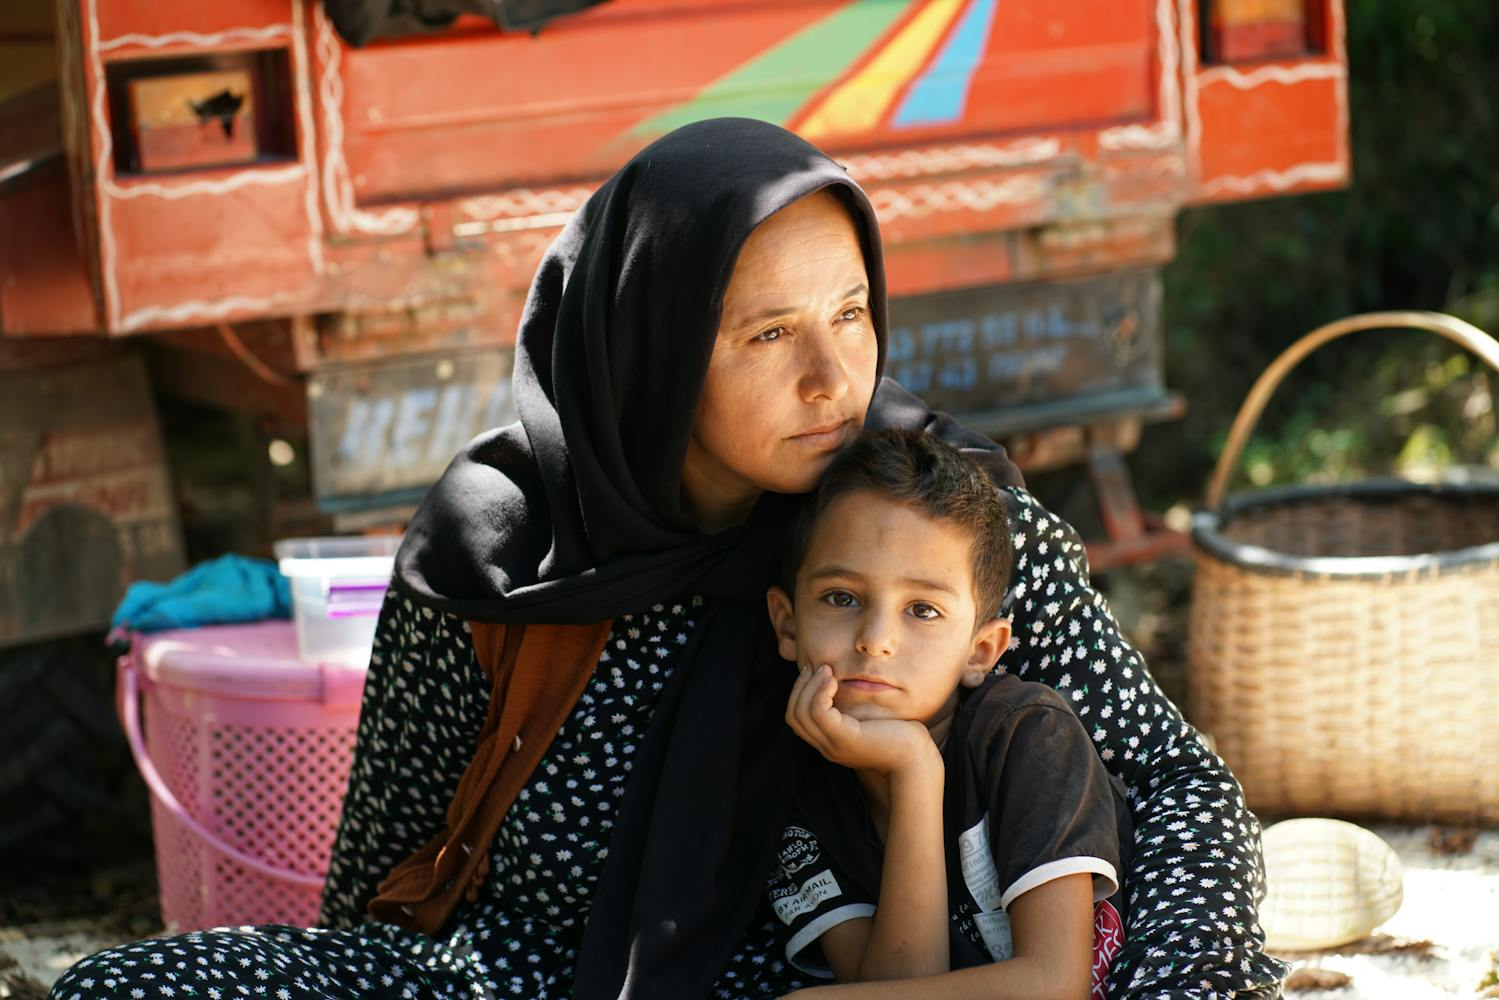

In [8]:
from IPython.display import Image, display
import random

def show_random_images(emotion_folder, emotion):
    folder_path = os.path.join(emotion_folder, emotion)
    if os.path.exists(folder_path):
        images = os.listdir(folder_path)
        if images:
            img_path = os.path.join(folder_path, random.choice(images))
            display(Image(img_path))
        else:
            print(f"No images found for {emotion}.")
    else:
        print(f"Emotion folder {emotion} does not exist.")

# Example
show_random_images(emotion_folder, "fear")


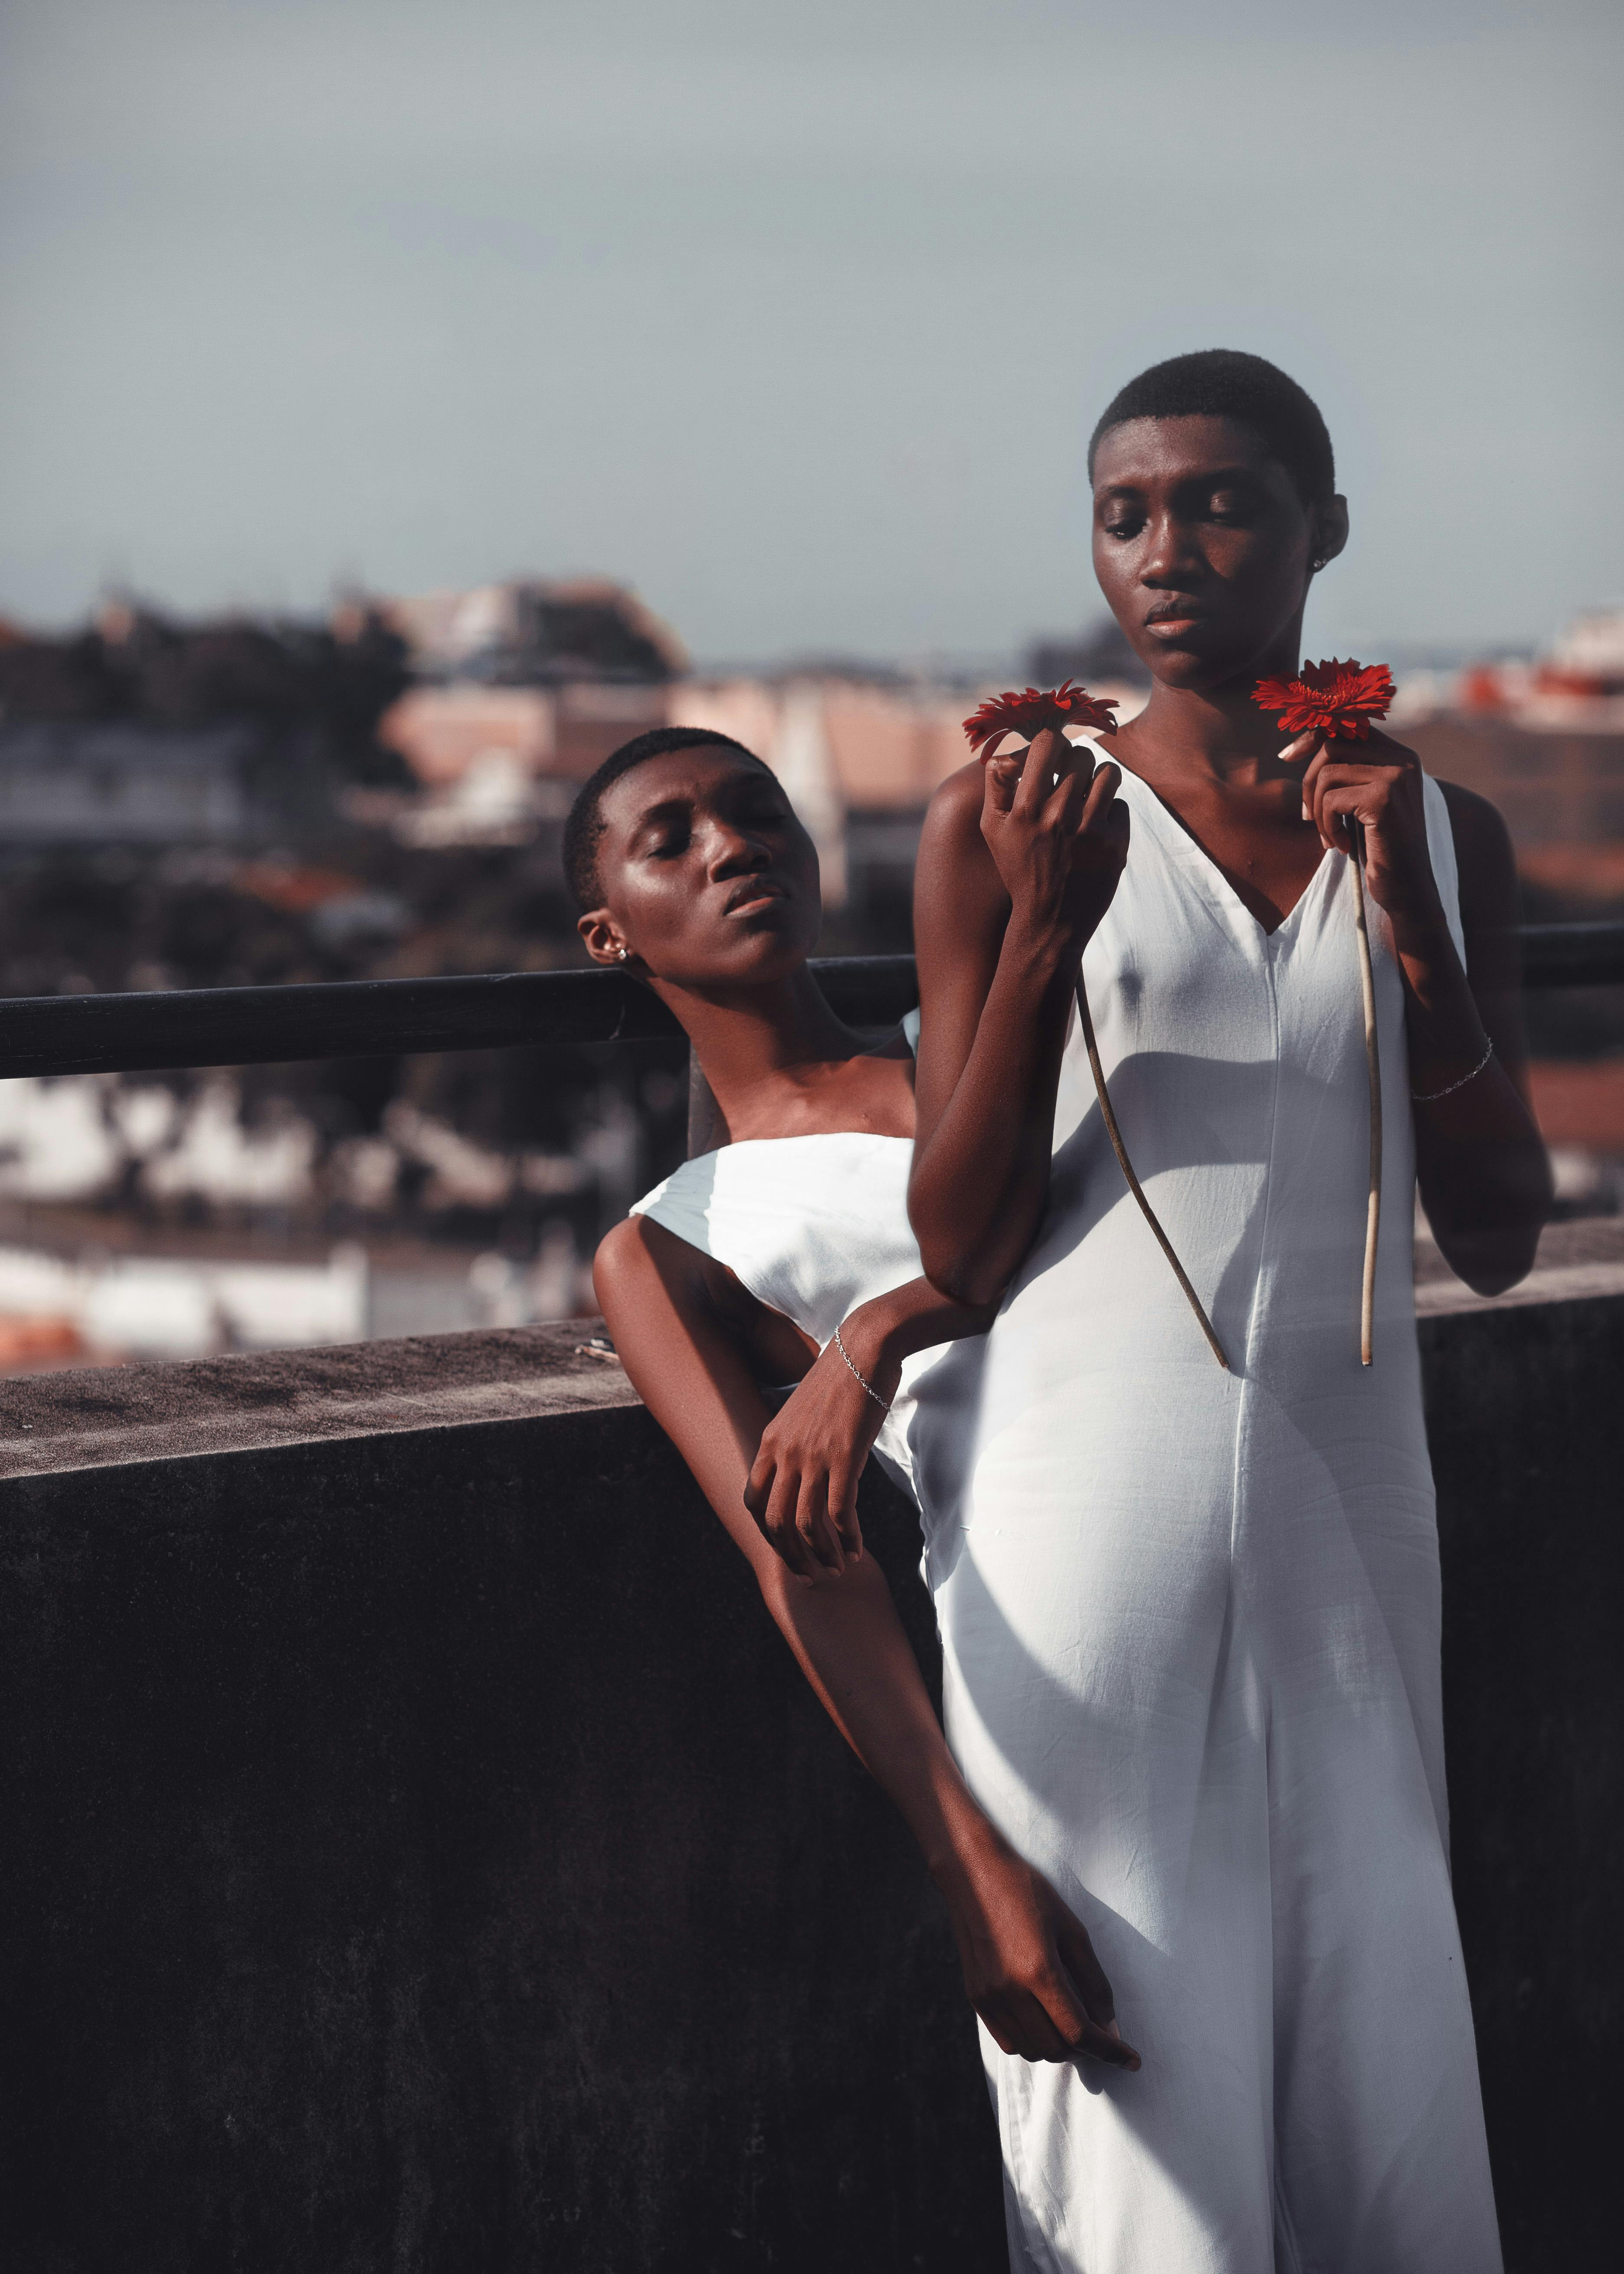

In [9]:
from IPython.display import Image, display
import random

def show_random_images(emotion_folder, emotion):
    folder_path = os.path.join(emotion_folder, emotion)
    if os.path.exists(folder_path):
        images = os.listdir(folder_path)
        if images:
            img_path = os.path.join(folder_path, random.choice(images))
            display(Image(img_path))
        else:
            print(f"No images found for {emotion}.")
    else:
        print(f"Emotion folder {emotion} does not exist.")

# Example
show_random_images(emotion_folder, "neutral")
